# 磁性体の統計力学

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] ='cm'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['xtick.major.pad'] = 18
plt.rcParams['ytick.major.pad'] = 18
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['figure.subplot.bottom'] = 0.2
plt.rcParams['figure.subplot.left'] = 0.2

## 常磁性体の磁化

$x = \pm2$で飽和する．

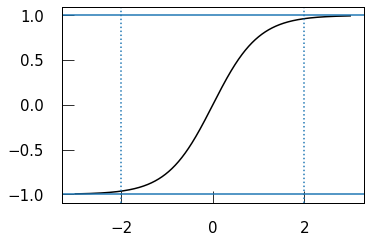

In [16]:
x = np.linspace(-3,3,1000)
mag = np.tanh(x)

plt.plot(x, mag, color="black")
plt.axhline(1)
plt.axhline(-1)
plt.axvline(2,linestyle="dotted")
plt.axvline(-2,linestyle="dotted")

logでみても何もわからん．それはそう．

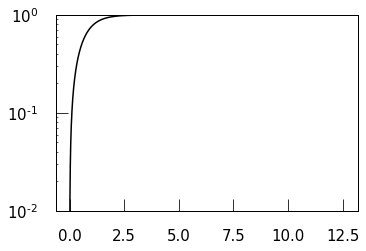

In [22]:
x = np.logspace(-10,1.1,1000)
mag = np.tanh(x)

plt.yscale("log")
plt.ylim(10**(-2),1)
plt.plot(x, mag, color="black")

## 常磁性体のエントロピー
$x = H/T$をとおして，磁場及び温度に依存．

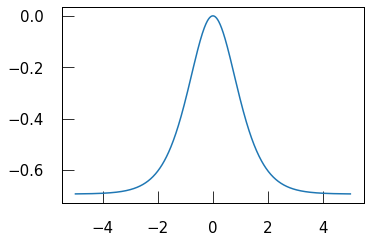

In [3]:
x = np.linspace(-5,5,1000)

S = np.log(np.cosh(x)) - x * np.tanh(x)

plt.plot(x, S)

## Heisenberg交換相互作用を考えたときの諸物理量

上の議論は，完全に各々のサイトを独立に扱っていた．
今度は，２つのspinの間に相互作用が働いていて，エネルギー固有値が
$$E_{\bf{\sigma}}=-J\sum_{i=1}^{N/2}\sigma_{2i-1}\sigma_{2i}-\mu_0H\sum_{j=1}^{N}\sigma_{j}$$
となる場合を考える．RHS第一項が相互作用の現れである．

### 比熱

$H\neq 0$のときの比熱も調べたいわね．

$H=0$のときの比熱．
極値は$\partial C(T)/\partial T=0$とすると，
$$\frac{1}{k_{\text{B}}T}\tanh(\frac{J}{k_{\text{B}}T})=1$$
の解．
$ x = k_{\text{B}}T, J=1　$　として，sageさんにfind_rootで計算してもらうと，$x=\tanh (1/x)$ の解は数値的に$0.8335565596009648$くらいらしい．

<ipython-input-4-715ccd11166b>:3: RuntimeWarning: divide by zero encountered in true_divide
  c = 1 / (x ** 2 * (np.cosh(1/x))**2)
<ipython-input-4-715ccd11166b>:3: RuntimeWarning: invalid value encountered in multiply
  c = 1 / (x ** 2 * (np.cosh(1/x))**2)


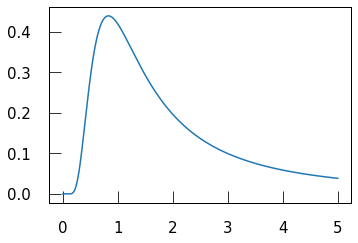

In [4]:
x = np.linspace(0,5,1000)

c = 1 / (x ** 2 * (np.cosh(1/x))**2)

plt.plot(x,c)

### 磁化率
$$\chi(\beta):=\frac{\partial\langle m \rangle(0)}{\partial H}$$
を磁化率という．外部磁場をかけたときの，磁化の応答と解釈できる量である．

この振る舞いが，Heisenberg相互作用の$J$の正負によって変わって面白い．

#### $J>0$

<ipython-input-4-299b2e3337f7>:3: RuntimeWarning: divide by zero encountered in true_divide
  chi = 1 / (x * (1 + np.exp(-1/x)))


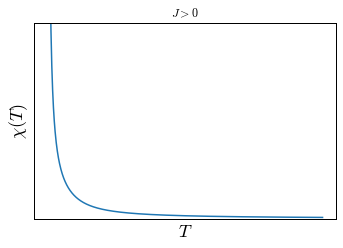

In [4]:
x = np.linspace(0, 4, 1000)

chi = 1 / (x * (1 + np.exp(-1/x)))

plt.title(r"$J>0$")
plt.xlabel(r"$T$", fontsize=18)
plt.ylabel(r"$\chi(T)$", fontsize=18)
plt.xticks([])
plt.yticks([])
plt.ylim(0,20)
plt.plot(x, chi)
plt.savefig("susceptibility_pos.png")

#### $J<0$

<ipython-input-5-e541a241d00a>:3: RuntimeWarning: divide by zero encountered in true_divide
  chi = 1 / (x * (1 + np.exp(1/x)))
<ipython-input-5-e541a241d00a>:3: RuntimeWarning: invalid value encountered in multiply
  chi = 1 / (x * (1 + np.exp(1/x)))


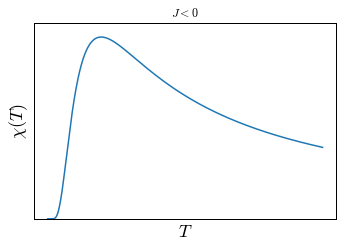

In [5]:
x = np.linspace(0, 4, 1000)

chi = 1 / (x * (1 + np.exp(1/x)))

plt.title(r"$J<0$")
plt.xlabel(r"$T$", fontsize=18)
plt.ylabel(r"$\chi(T)$", fontsize=18)
plt.xticks([])
plt.yticks([])
plt.ylim(0,0.3)
plt.plot(x, chi)
plt.savefig("susceptivility_neg.png")

#### logで見てみる．

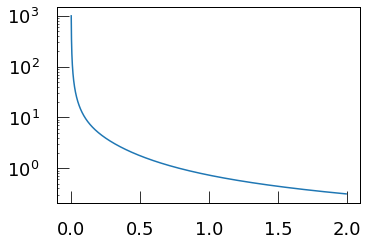

In [39]:
x = np.logspace(-3, 0.3, 1000)

chi = 1 / (x * (1 + np.exp(-1/x)))

plt.yscale("log")

# plt.title(r"$J>0$")
# plt.xlabel(r"$T$", fontsize=18)
# plt.ylabel(r"$\chi(T)$", fontsize=18)
# plt.xticks([])
# plt.yticks([])
# plt.ylim(-4,2)
plt.plot(x, chi)

<ipython-input-67-26e97334a48f>:3: RuntimeWarning: overflow encountered in exp
  chi = 1 / (x * (1 + np.exp(1/x)))


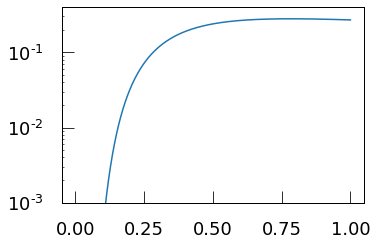

In [67]:
x = np.logspace(-4,0,1000)

chi = 1 / (x * (1 + np.exp(1/x)))

plt.yscale("log")
# plt.title(r"$J<0$")
# plt.xlabel(r"$T$", fontsize=18)
# plt.ylabel(r"$\chi(T)$", fontsize=18)
# plt.xticks([])
# plt.yticks([])
plt.ylim(0.001,0.4)
plt.plot(x, chi)

## 2準位系の比熱
Schottky型の比熱

<ipython-input-3-a2bd1931d4f0>:3: RuntimeWarning: divide by zero encountered in true_divide
  c = (1 / (x ** 2)) * (1 / ((np.cosh(1/x)) ** 2))
<ipython-input-3-a2bd1931d4f0>:3: RuntimeWarning: invalid value encountered in multiply
  c = (1 / (x ** 2)) * (1 / ((np.cosh(1/x)) ** 2))


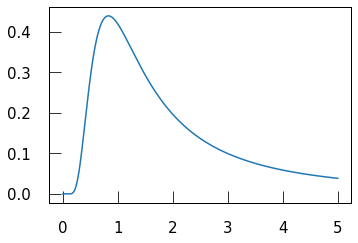

In [3]:
x = np.linspace(0,5,1000)

c = (1 / (x ** 2)) * (1 / ((np.cosh(1/x)) ** 2))

plt.plot(x, c)